In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import ipaddress

In [3]:
# Load Fraud_Data.csv and IpAddress_to_Country.csv
fraud_data = pd.read_csv('../data/Fraud_Data.csv')

In [4]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [5]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [6]:
ip_data = pd.read_csv('../data/IpAddress_to_Country.csv')

In [7]:
ip_data

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [8]:
ip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
fraud_data.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [10]:
ip_data.isnull().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [11]:
ip_data.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [12]:
# Remove duplicates
fraud_data.drop_duplicates(inplace=True)

In [13]:
# Remove duplicates
ip_data.drop_duplicates(inplace=True)

In [14]:
# Convert signup_time and purchase_time to datetime
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Ensure numerical columns have correct data types
fraud_data['purchase_value'] = fraud_data['purchase_value'].astype(float)
fraud_data['age'] = fraud_data['age'].astype(int)

In [15]:
fraud_data['ip_address'] = fraud_data['ip_address'].astype(str)

import ipaddress

def to_ip_integer(ip):
    try:
        return int(ipaddress.ip_address(ip))
    except ValueError:
        return None  # Handle invalid IPs as needed

fraud_data['ip_integer'] = fraud_data['ip_address'].apply(to_ip_integer)

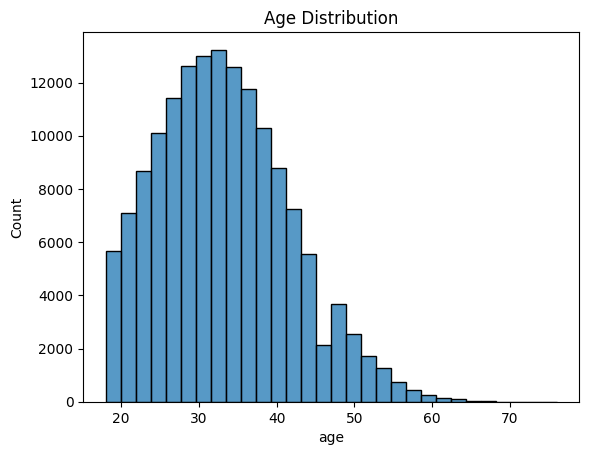

In [16]:
# Univariate Analysis (e.g., plot histograms for numerical features)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot age distribution
sns.histplot(fraud_data['age'], bins=30)
plt.title('Age Distribution')
plt.show()

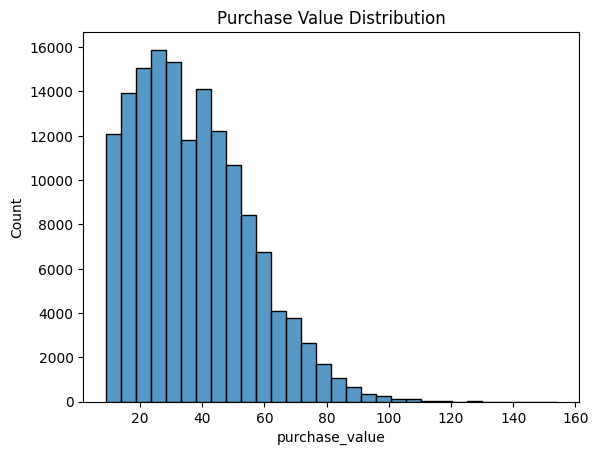

In [17]:
# Plot purchase_value distribution
sns.histplot(fraud_data['purchase_value'], bins=30)
plt.title('Purchase Value Distribution')
plt.show()

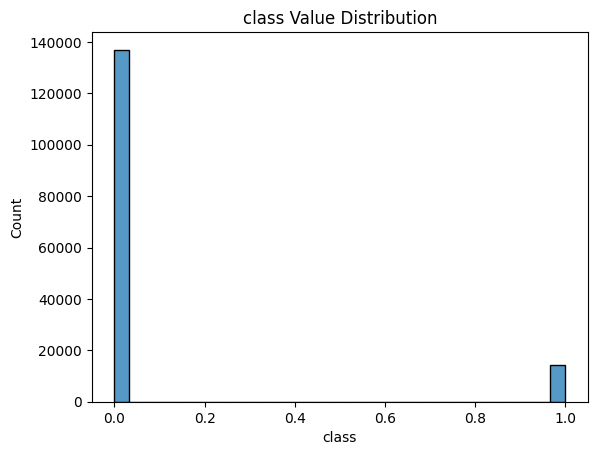

In [18]:
# Plot purchase_value distribution
sns.histplot(fraud_data['class'], bins=30)
plt.title('class Value Distribution')
plt.show()

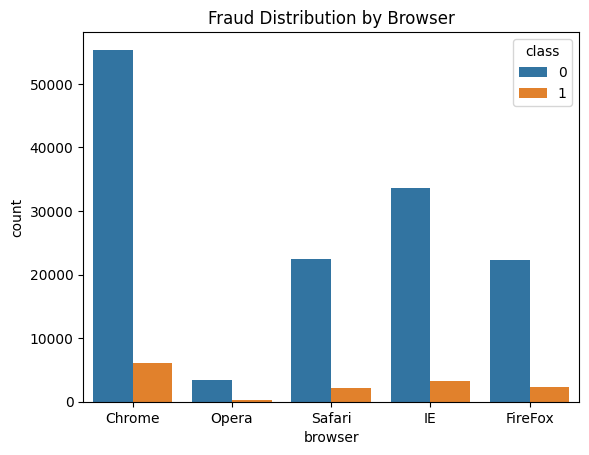

In [19]:
# Analyze fraud distribution across categorical variables (browser, source)
sns.countplot(x='browser', hue='class', data=fraud_data)
plt.title('Fraud Distribution by Browser')
plt.show()

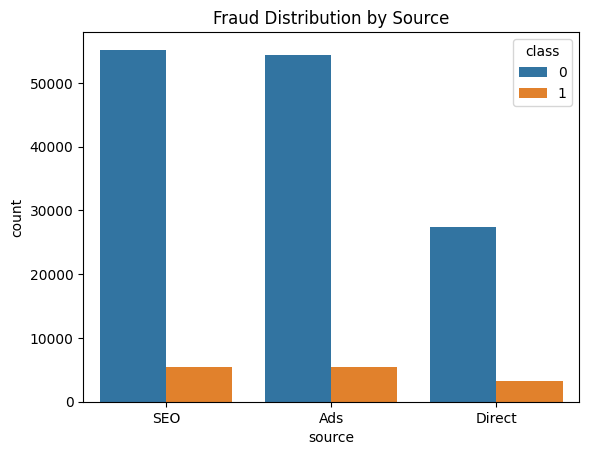

In [20]:
sns.countplot(x='source', hue='class', data=fraud_data)
plt.title('Fraud Distribution by Source')
plt.show()

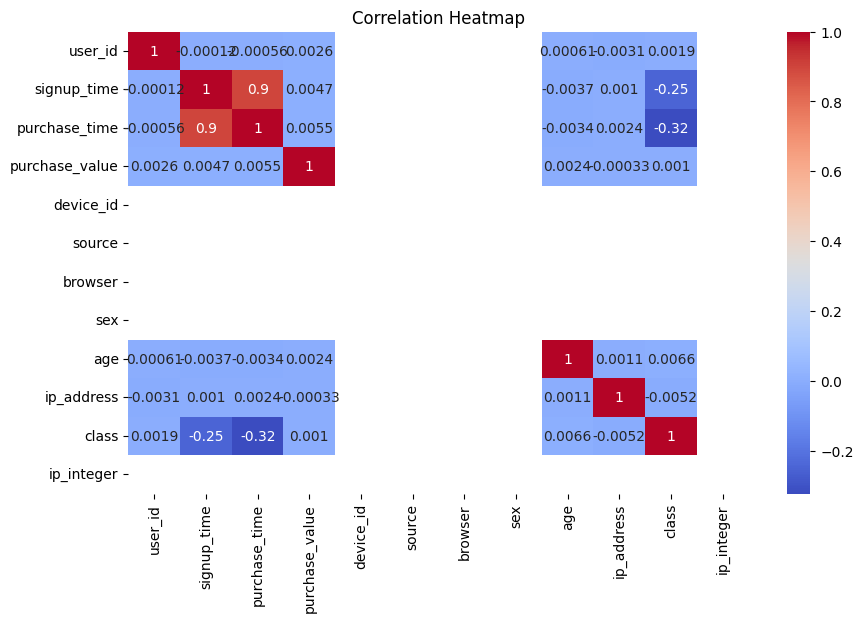

In [21]:
# Identify non-numeric columns
non_numeric_columns = fraud_data.select_dtypes(exclude='number').columns

# Convert non-numeric columns to numeric (if possible), or drop them
for col in non_numeric_columns:
    fraud_data[col] = pd.to_numeric(fraud_data[col], errors='coerce')

# Drop columns that are still non-numeric (optional)
fraud_data_num = fraud_data.drop(columns=fraud_data.select_dtypes(exclude='number').columns)

# Create the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(fraud_data_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Convert IP addresses to string (if they are in float format)
fraud_data['ip_address'] = fraud_data['ip_address'].astype(str)

# Define the function to get country from IP
def get_country(ip):
    try:
        ip_int = int(ipaddress.ip_address(ip))
        match = ip_data[(ip_data['lower_bound_ip'] <= ip_int) & (ip_data['upper_bound_ip'] >= ip_int)]
        if not match.empty:
            return match['country'].values[0]
    except ValueError:
        return np.nan  # Return NaN for invalid IPs
    return np.nan

# Apply the function to the 'ip_address' column
fraud_data['country'] = fraud_data['ip_address'].apply(get_country)

In [23]:
# Convert 'purchase_time' to datetime
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')

# Check if conversion was successful
fraud_data['purchase_time'].head()

# Transaction count per user
fraud_data['transaction_count_per_user'] = fraud_data.groupby('user_id')['purchase_time'].transform('count')

# Transaction velocity (time difference between transactions per user in seconds)
fraud_data['transaction_velocity'] = fraud_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds().fillna(0)

# Optionally, display the updated DataFrame
fraud_data[['user_id', 'purchase_time', 'transaction_count_per_user', 'transaction_velocity']]

,user_id,purchase_time,transaction_count_per_user,transaction_velocity
0,22058,2015-04-18 02:47:11,1,0.0
1,333320,2015-06-08 01:38:54,1,0.0
2,1359,2015-01-01 18:52:45,1,0.0
3,150084,2015-05-04 13:54:50,1,0.0
4,221365,2015-09-09 18:40:53,1,0.0
...,...,...,...,...
151107,345170,2015-03-29 00:30:47,1,0.0
151108,274471,2015-05-26 12:24:39,1,0.0
151109,368416,2015-05-20 07:07:47,1,0.0
151110,207709,2015-09-07 09:34:46,1,0.0


In [24]:
# Extract hour_of_day and day_of_week from purchase_time
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

In [25]:
# Apply StandardScaler to numerical columns like 'purchase_value' and 'age'
scaler = StandardScaler()

# Columns to scale
fraud_data[['purchase_value', 'age', 'transaction_velocity']] = scaler.fit_transform(fraud_data[['purchase_value', 'age', 'transaction_velocity']])

In [26]:
# One-Hot Encoding for categorical variables (e.g., 'source', 'browser', 'sex')
fraud_data = pd.get_dummies(fraud_data, columns=['source', 'browser', 'sex'], drop_first=True)

In [27]:
# View the final processed dataset
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,ip_integer,country,transaction_count_per_user,transaction_velocity,hour_of_day,day_of_week
0,22058,1424818549000000000,2015-04-18 02:47:11,-0.160204,NaN,0.679914,732758368.79972,0,NaN,NaN,1,0.0,2,5
1,333320,1433709590000000000,2015-06-08 01:38:54,-1.142592,NaN,2.304476,350311387.865908,0,NaN,NaN,1,0.0,1,0
2,1359,1420138364000000000,2015-01-01 18:52:45,-1.197169,NaN,2.304476,2621473820.11095,1,NaN,NaN,1,0.0,18,3
3,150084,1430255605000000000,2015-05-04 13:54:50,0.385567,NaN,0.911994,3840542443.91396,0,NaN,NaN,1,0.0,13,0
4,221365,1437462592000000000,2015-09-09 18:40:53,0.112681,NaN,1.376155,415583117.452712,0,NaN,NaN,1,0.0,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,1422327814000000000,2015-03-29 00:30:47,0.330990,NaN,-0.596528,3451154526.62433,1,NaN,NaN,1,0.0,0,6
151108,274471,1431711809000000000,2015-05-26 12:24:39,-0.105627,NaN,-0.132367,2439047221.24922,0,NaN,NaN,1,0.0,12,1
151109,368416,1425424051000000000,2015-05-20 07:07:47,0.167258,NaN,-0.828608,2748470523.70511,0,NaN,NaN,1,0.0,7,2
151110,207709,1436472367000000000,2015-09-07 09:34:46,0.494721,NaN,0.447833,3601174708.16967,0,NaN,NaN,1,0.0,9,0


In [28]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   user_id                     151112 non-null  int64         
 1   signup_time                 151112 non-null  int64         
 2   purchase_time               151112 non-null  datetime64[ns]
 3   purchase_value              151112 non-null  float64       
 4   device_id                   0 non-null       float64       
 5   age                         151112 non-null  float64       
 6   ip_address                  151112 non-null  object        
 7   class                       151112 non-null  int64         
 8   ip_integer                  0 non-null       float64       
 9   country                     0 non-null       float64       
 10  transaction_count_per_user  151112 non-null  int64         
 11  transaction_velocity        151112 non-

In [29]:
# Drop columns where all values are NaN
df = fraud_data.dropna(axis=1, how='all')

# Display the updated DataFrame
df

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class,transaction_count_per_user,transaction_velocity,hour_of_day,day_of_week
0,22058,1424818549000000000,2015-04-18 02:47:11,-0.160204,0.679914,732758368.79972,0,1,0.0,2,5
1,333320,1433709590000000000,2015-06-08 01:38:54,-1.142592,2.304476,350311387.865908,0,1,0.0,1,0
2,1359,1420138364000000000,2015-01-01 18:52:45,-1.197169,2.304476,2621473820.11095,1,1,0.0,18,3
3,150084,1430255605000000000,2015-05-04 13:54:50,0.385567,0.911994,3840542443.91396,0,1,0.0,13,0
4,221365,1437462592000000000,2015-09-09 18:40:53,0.112681,1.376155,415583117.452712,0,1,0.0,18,2
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,1422327814000000000,2015-03-29 00:30:47,0.330990,-0.596528,3451154526.62433,1,1,0.0,0,6
151108,274471,1431711809000000000,2015-05-26 12:24:39,-0.105627,-0.132367,2439047221.24922,0,1,0.0,12,1
151109,368416,1425424051000000000,2015-05-20 07:07:47,0.167258,-0.828608,2748470523.70511,0,1,0.0,7,2
151110,207709,1436472367000000000,2015-09-07 09:34:46,0.494721,0.447833,3601174708.16967,0,1,0.0,9,0
